<a href="https://colab.research.google.com/github/danidmvz/PyTorch_tutorial/blob/main/PyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch tutorial**



## Installing and loading PyTorch

In [1]:
!pip install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

## Data types and definitions of tensors
- **torch.mm**: performs a matrix multiplication without broadcasting (2D tensor) by (2D tensor)
- **torch.mul**: performs a elementwise multiplication with broadcasting (Tensor) by (Tensor or Number)
- **torch.matmul**: matrix product with broadcasting (Tensor) by (Tensor) with different behaviors depending on the tensor shapes (dot product, matrix product, batched matrix products).

In [ ]:
a1=torch.tensor([1.3])
print(a1)
print(a1.type())
print(a1.dtype)
print(a1.size())

tensor([1.3000])
torch.FloatTensor
torch.float32
torch.Size([1])


In [ ]:
a12 = torch.tensor([1, 2]); print(a12); print(a12.size())
a22 = torch.tensor([[1, 2],[3, 4]]); print(a22); print(a22.size())
a23 = torch.tensor([[1, 2, 3],[4, 5, 6]]); print(a23); print(a23.size())

tensor([1, 2])
torch.Size([2])
tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [ ]:
print(torch.matmul(a12,a12))
print(torch.dot(a12,a12))

tensor(5)
tensor(5)


In [ ]:
print(torch.matmul(a22,a23))
print(torch.matmul(a12,a23))

tensor([[ 9, 12, 15],
        [19, 26, 33]])
tensor([ 9, 12, 15])


In [ ]:
print(torch.mul(a22,a22))
print(torch.mul(a12*100,a22)) # This has extended the a12 vector to [[a12],[a12]]

tensor([[ 1,  4],
        [ 9, 16]])
tensor([[100, 400],
        [300, 800]])


## Automatic differentiation



- With analytical expressions


<ipython-input-3-28a79b9ab573>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x0, requires_grad=True)


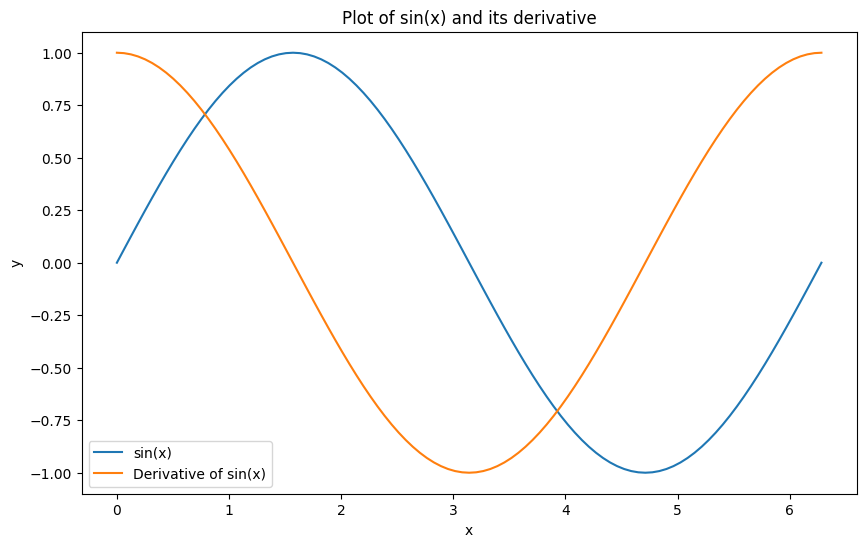

In [3]:
# Define the input value
x0 = torch.linspace(0, 2 * torch.pi, 101)
x = torch.tensor(x0, requires_grad=True)

# Define the function
y = torch.sin(x)

# Compute the derivative
y.sum().backward()

# Access the derivative
dy_dx = x.grad

# Convert tensors to numpy arrays for plotting
x = x.detach().numpy()
y = y.detach().numpy()
dy_dx = dy_dx.detach().numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)')
plt.plot(x, dy_dx, label='Derivative of sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sin(x) and its derivative')
plt.legend()
plt.show()

- With numerical expressions

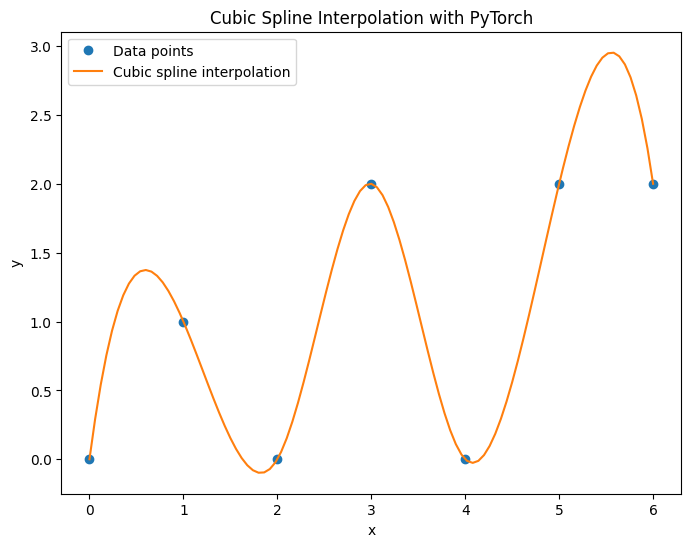

In [5]:
# Generate data points
x_torch = torch.tensor([0., 1., 2., 3., 4., 5., 6.], requires_grad=True)
y_torch = torch.tensor([0., 1., 0., 2., 0., 2. ,2.])

# Perform cubic spline interpolation
cs = CubicSpline(x_torch.detach().numpy(), y_torch.detach().numpy())

# Create a linespaced vector for plotting
x_interp = np.linspace(0, 6, 101)
y_interp = cs(x_interp)

# Plot the original data points and the interpolated curve
plt.figure(figsize=(8, 6))
plt.plot(x_torch.detach().numpy(), y_torch.detach().numpy(), 'o', label='Data points')
plt.plot(x_interp, y_interp, label='Cubic spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation with PyTorch')
plt.legend()
plt.show()

In [7]:
x_torch = torch.tensor([0., 1., 2., 3., 4., 5., 6.,], requires_grad=True)
y_torch = torch.tensor([0., 1., 2., 2., 3., 2., 0.,], requires_grad=True)
x0 = x_torch[-2]
y0 = y_torch[-2]
x1 = x_torch[-1]
y1 = y_torch[-1]
a = print((-y0 + y1)/(x0 - x1)**2)
b = print((2*x1*(y0 - y1))/(x0 - x1)**2)
c = print((x0**2*y0 - 2*x0*x1*y0 + x1**2*y1)/(x0 - x1)**2)

tensor(-2., grad_fn=<DivBackward0>)
tensor(24., grad_fn=<DivBackward0>)
tensor(-70., grad_fn=<DivBackward0>)


In [9]:
print(y_interp)

[ 0.          0.29029329  0.54111771  0.754533    0.93259886  1.077375
  1.19092114  1.275297    1.33256229  1.36477671  1.374       1.36229186
  1.331712    1.28432014  1.222176    1.14733929  1.06186971  0.967827
  0.86727086  0.762261    0.65485714  0.547119    0.44110629  0.33887871
  0.242496    0.15401786  0.075504    0.00901414 -0.043392   -0.07965471
 -0.09771429 -0.095511   -0.07098514 -0.022077    0.05298286  0.15258929
  0.27296     0.41027643  0.56072     0.72047214  0.88571429  1.05262786
  1.21739429  1.376195    1.52521143  1.660625    1.77861714  1.87536929
  1.94706286  1.98987929  2.          1.97493329  1.91749486  1.83182729
  1.72207314  1.592375    1.44687543  1.289717    1.12504229  0.95699386
  0.78971429  0.62734614  0.474032    0.33391443  0.211136    0.10983929
  0.03416686 -0.011779   -0.02631314 -0.011497    0.03028571  0.09665129
  0.185216    0.29359614  0.419408    0.56026786  0.713792    0.87759671
  1.04929829  1.226513    1.40685714  1.587947    1.767

None


AttributeError: ignored

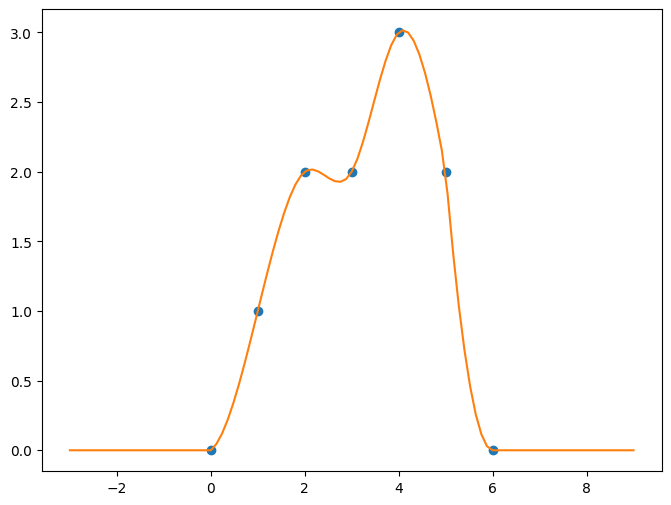

In [15]:
x_torch = torch.tensor([0., 1., 2., 3., 4., 5., 6.], requires_grad=True)
y_torch = torch.tensor([0., 1., 2., 2., 3., 2., 0.], requires_grad=True)

# Define the function for derivative computation
def interpolated_function(x):
  x_torch = torch.tensor([0., 1., 2., 3., 4., 5., 6.], requires_grad=True)
  y_torch = torch.tensor([0., 1., 2., 2., 3., 2., 0.], requires_grad=True)
  # Generate data points using PyTorch tensors
  x_np = x.detach().numpy()
  y_interp = []
  for val in x_np:
      if val < x_torch.min() or val > x_torch.max(): # Far out the interval, it should be zero
          y_interp.append(0)
      elif val >= x_torch[-2] and val <= x_torch[-1]: # At the end
        x0 = x_torch[-2]
        y0 = y_torch[-1]
        x1 = x_torch[-1]
        y1 = y_torch[-2]
        a = (-y0 + y1)/(x0 - x1)**2
        b = (2*x1*(y0 - y1))/(x0 - x1)**2
        c = (x0**2*y0 - 2*x0*x1*y0 + x1**2*y1)/(x0 - x1)**2
        y_interp.append(a*val**2 + b*val + c)
      elif val >= x_np[0] and val <= x_np[1]: # At the beginning
        x0 = x_torch[0]
        y0 = y_torch[0]
        x1 = x_torch[1]
        y1 = y_torch[1]
        a = (-y0 + y1)/(x0 - x1)**2
        b = (2*x0*(y0 - y1))/(x0 - x1)**2
        c = (-2*x0*x1*y0 + x1**2*y0 + x0**2*y1)/(x0 - x1)**2
        y_interp.append(a*val**2 + b*val + c)
      else:
          cs = CubicSpline(x_torch.detach().numpy(), y_torch.detach().numpy())
          y_interp.append(cs(val))
  return torch.tensor(y_interp, requires_grad=True)  # Convert y_interp to a NumPy array


# Compute the derivative using automatic differentiation
x = torch.tensor(np.linspace(-3., 9., 101), requires_grad=True)
y = interpolated_function(x)
y.sum().backward()

# Access the derivative
dy_dx = x.grad
print(dy_dx)

# Plot the original data points and the interpolated curve
plt.figure(figsize=(8, 6))
plt.plot(x_torch.detach().numpy(), y_torch.detach().numpy(), 'o', label='Data points')
plt.plot(x.detach().numpy(), y.detach().numpy(), label='Cubic spline interpolation')
plt.plot(x.detach().numpy(), dy_dx.detach().numpy(), label='Derivative of cubic spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation with Derivative using PyTorch')
plt.legend()
plt.show()
